# Weather Derivative Pricing

CME weather derivative [whitepaper](https://www.cmegroup.com/education/articles-and-reports/managing-climate-risk-with-cme-group-weather-futures-and-options.html).

In this notebook we introduce basic weather derivative pricing methods. 

There is no standard model for valuing weather derivatives similar to the Black–Scholes formula for pricing European style equity option and similar derivatives. That is because the underlying asset of the weather derivative is non-tradeable which violates a number of key assumptions of the Black-Scholes Model. 

In general, weather derivatives are most cost-effective for covering low-probability events with severe impacts, such as drought. Unlike traditional insurance schemes, index-based weather derivatives allow for rapid disbursements as there is no need for an assessment of loss incurred.

In [23]:
import numpy as np
import matplotlib.pyplot as plt


Meteorological data records the highest and lowest observed temperature in a day, from this we form an average to indicate a daily temperature.

$$ T_{avg} = \frac{T_{max} + T_{min}}{2}.$$

A heating degree day (HDD) is an indication of a cold day, it quantifies how much the average temperature was below a specified threshold, in the US this is taken to be $65^{\circ}\text{F} \approx 18.3^{\circ}\text{C}$.

$$HDD = \max(65-T_{avg}, 0).$$  

In a given time period, $P$, the total heating degree days is given by:

$$HDD_{P} = \sum_{d\in P} \max(65-T_{avg}, 0).$$

Similarly, a cooling degree day quantifies how much the average temperature was above a specified threshold.

$$CDD = \max(T_{avg}-65, 0).$$  

Over a given time period, $P$, the total cooling degree days is given by:

$$CDD_{P} =  \sum_{d\in P} \max(T_{avg}-65, 0).$$

The number of heating degree or cooling degree days in a period, will serve as the underlying index for contracts governing the US. 

Over the counter the typical CDD season is 15-May - 15-Sep (15/05-15/09) and HDD season is 15-Dec-15-Mar (15/12-15/03).

In standardised contracts traded on the Chicago Mercentile Exchange (CME), for summer cooling periods European regions and annually for Tokyo the underlying index is instead the cumulative average temperature over a calendar month.

#### Pricing

Now we have established the underlying index in the options contracts we now present the conventional pricing contract. A call option with a strike of S will payout if the number of degree days (DD) is less than the strike.

$$ \text{call payout} = \alpha \max(DD - S, 0).$$

Due to inherient unpredictability in the weather, these are often capped, $C$,

$$ \text{call payout} = \min(\alpha \max(DD - S, 0), C).$$

The party selling this contract will ask for a premium, as one intuitively expects, the further out of the money (i.e., away from normal
conditions) the strike is set, the lower the price of the option (the premium).

$\alpha$ is the tick-size which is the payout per degree day. 

#### Example of a weather derivative contract

An energy company may be dependent on cold winters in order to ensure profit, therefore they would wish to buy a put future which would pay out if the number of heating degree days is less than a specified value. 

For example, with $\alpha=3,000,~cap=100*3000,~strike=200$ DDs.

In [24]:
def put_payoff(hdd, alpha=3000, cap=100, strike=200):
    return alpha * np.minimum(cap, np.maximum(0, strike-hdd))

def call_payoff(hdd, alpha=3000, cap=100, strike=200):
    return alpha * np.minimum(cap, np.maximum(0, hdd-strike))

hdds = np.linspace(0, 500, num=501)

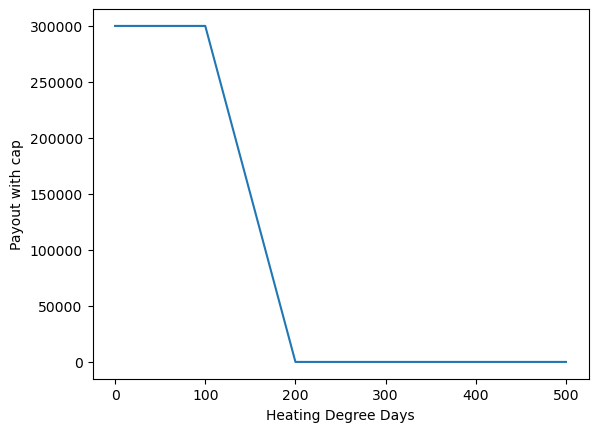

In [25]:
plt.xlabel("Heating Degree Days")
plt.ylabel("Payout with cap")
plt.plot(hdds, put_payoff(hdds))

#### Collar

To hedge against a mild winter, a gas company can purchase a put future which pays out if there are few heating degree days in the winter seasion. They can also sell a call future which requires them to pay if there are many heating degree days in the season, but otherwise they keep the premium of providing the contract. They can afford to payout the call contract in this case as the very cold winter will provide them with a lot of profit. This is visualised below. 

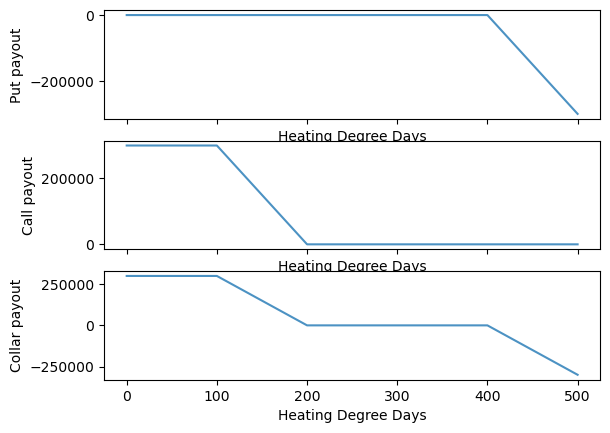

In [26]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[1].plot(hdds, put_payoff(hdds, cap=100, strike = 200), label="Put", alpha=0.8)
axs[0].plot(hdds, -call_payoff(hdds, cap=100, strike=400), label="Call", alpha=0.8)
axs[2].plot(hdds, put_payoff(hdds, cap=100, strike = 200) - call_payoff(hdds, cap=100, strike=400), label="Collar", alpha=0.8)

axs[0].set_xlabel("Heating Degree Days")
axs[1].set_xlabel("Heating Degree Days")
axs[2].set_xlabel("Heating Degree Days")

axs[0].set_ylabel("Put payout")
axs[1].set_ylabel("Call payout")
axs[2].set_ylabel("Collar payout")

plt.show()

A full list of all standardised weather instruments listed on the CME can be found [here](https://www.cmegroup.com/markets/products.html#assetClass=5&sortDirection=desc&sortField=vol). For example, for degree day contracts, an index point is one degree day and the payout is a multiple of $20 per tick. Having standardised contracts which are traded through exchanges promotes the liquidity of these instruments.

# Questions

Is this an appropriate pricing model? 20 days of 1 degree above is priced the same as 5 days 4 degrees above, are these equally improbable events?
